In [1]:
# Library
import pandas as pd
import numpy as np

# # Google Colab
# from google.colab import files

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
from IPython.display import display

# EDA Libraries
from skrub import TableReport

# Feature Engineering
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce

# Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import roc_curve, roc_auc_score

# Imbalance Dataset
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Set max columns
pd.set_option('display.max_columns', None)

In [2]:
# uploaded = files.upload()
path = "hotel_bookings.csv"
df = pd.read_csv(path)

In [3]:
# General table report
report = TableReport(df, max_plot_columns=32, max_association_columns=32)
report

Processing column  32 / 32


,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [4]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)])

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,hotel,object,0,0.00,2,"[Resort Hotel, City Hotel]"
1,is_canceled,int64,0,0.00,2,"[1, 0]"
2,lead_time,int64,0,0.00,479,"[279, 248]"
3,arrival_date_year,int64,0,0.00,3,"[2017, 2016]"
4,arrival_date_month,object,0,0.00,12,"[April, November]"
5,arrival_date_week_number,int64,0,0.00,53,"[16, 11]"
6,arrival_date_day_of_month,int64,0,0.00,31,"[14, 21]"
7,stays_in_weekend_nights,int64,0,0.00,17,"[6, 10]"
8,stays_in_week_nights,int64,0,0.00,35,"[15, 30]"
9,adults,int64,0,0.00,14,"[26, 40]"


In [5]:
# Handling Missing Values in hotel_bookings.csv

# Fill missing values using dictionary format
df.fillna({
    'children': 0,
    'country': 'Unknown',
    'agent': 0,
    'company': 0
}, inplace=True)

# Convert agent & company to integer for consistency
df['agent'] = df['agent'].astype(int)
df['company'] = df['company'].astype(int)

In [6]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)])

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,hotel,object,0,0.0,2,"[City Hotel, Resort Hotel]"
1,is_canceled,int64,0,0.0,2,"[1, 0]"
2,lead_time,int64,0,0.0,479,"[482, 81]"
3,arrival_date_year,int64,0,0.0,3,"[2017, 2015]"
4,arrival_date_month,object,0,0.0,12,"[August, September]"
5,arrival_date_week_number,int64,0,0.0,53,"[49, 37]"
6,arrival_date_day_of_month,int64,0,0.0,31,"[24, 26]"
7,stays_in_weekend_nights,int64,0,0.0,17,"[16, 4]"
8,stays_in_week_nights,int64,0,0.0,35,"[19, 2]"
9,adults,int64,0,0.0,14,"[1, 0]"


In [7]:
# Exact Duplicate
if df.duplicated().any():
    print("Duplicate rows found.")
    print("Total duplicate rows:", df.duplicated().sum())
    print("Persentase Duplicate Row", round((df.duplicated().sum()/len(df))*100,2),"%")
    duplicated_row = df[df.duplicated(keep=False)]
else:
    print("No duplicate rows found.")

Duplicate rows found.
Total duplicate rows: 31994
Persentase Duplicate Row 26.8 %


In [8]:
# Remove exact duplicates
df = df.drop_duplicates().reset_index(drop=True)

# Recheck exact duplicates
if df.duplicated().any():
    print("Duplicate rows found.")
    print("Total duplicate rows:", df.duplicated().sum())
    print("Persentase Duplicate Row", round((df.duplicated().sum()/len(df))*100,2),"%")
    duplicated_row = df[df.duplicated(keep=False)]
else:
    print("No duplicate rows found.")

No duplicate rows found.


In [9]:
no_guest = df['adults'] + df['children'] + df['babies']
no_guest = no_guest[no_guest == 0]
no_guest.count()

np.int64(166)

In [10]:
# Remove rows where the total number of guests is zero
df = df[df[["adults", "children", "babies"]].sum(axis=1) != 0]

# Check again
no_guest = df['adults'] + df['children'] + df['babies']
no_guest = no_guest[no_guest == 0]
no_guest.count()

np.int64(0)

In [11]:
# Rechecking the table report
report = TableReport(df, max_plot_columns=32, max_association_columns=32)
report

Processing column  32 / 32


,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


array([[<Axes: title={'center': 'is_canceled'}>,
        <Axes: title={'center': 'lead_time'}>,
        <Axes: title={'center': 'arrival_date_year'}>,
        <Axes: title={'center': 'arrival_date_week_number'}>],
       [<Axes: title={'center': 'arrival_date_day_of_month'}>,
        <Axes: title={'center': 'stays_in_weekend_nights'}>,
        <Axes: title={'center': 'stays_in_week_nights'}>,
        <Axes: title={'center': 'adults'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'babies'}>,
        <Axes: title={'center': 'is_repeated_guest'}>,
        <Axes: title={'center': 'previous_cancellations'}>],
       [<Axes: title={'center': 'previous_bookings_not_canceled'}>,
        <Axes: title={'center': 'booking_changes'}>,
        <Axes: title={'center': 'agent'}>,
        <Axes: title={'center': 'company'}>],
       [<Axes: title={'center': 'days_in_waiting_list'}>,
        <Axes: title={'center': 'adr'}>,
        <Axes: title={'center': 'required_ca

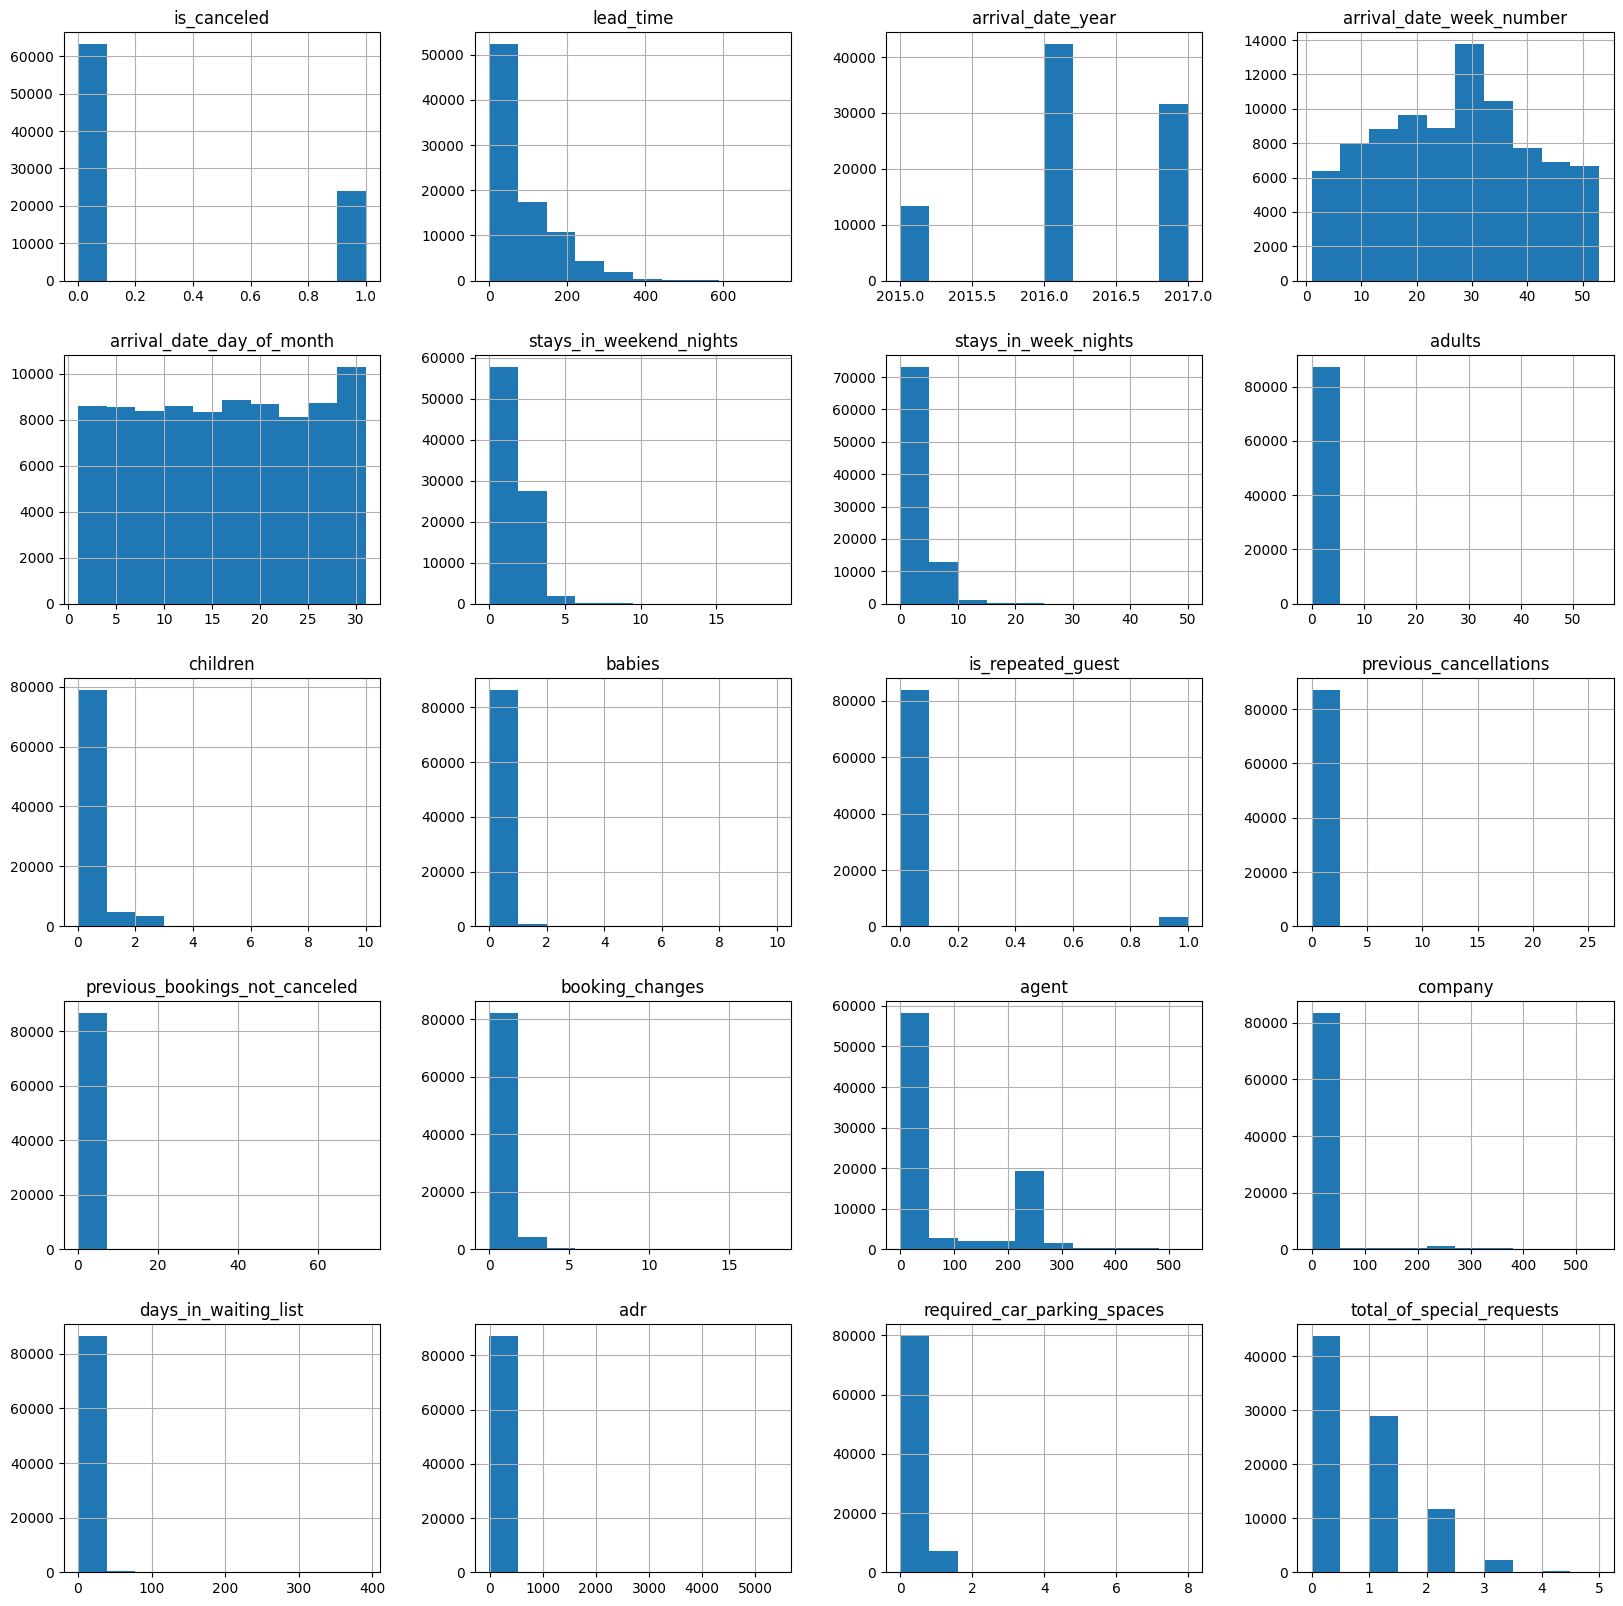

In [12]:
# buat histogram untuk sebaran data
df.hist(figsize=(20,20))

In [13]:
display(df.head(), df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 87230 entries, 0 to 87395
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87230 non-null  object 
 1   is_canceled                     87230 non-null  int64  
 2   lead_time                       87230 non-null  int64  
 3   arrival_date_year               87230 non-null  int64  
 4   arrival_date_month              87230 non-null  object 
 5   arrival_date_week_number        87230 non-null  int64  
 6   arrival_date_day_of_month       87230 non-null  int64  
 7   stays_in_weekend_nights         87230 non-null  int64  
 8   stays_in_week_nights            87230 non-null  int64  
 9   adults                          87230 non-null  int64  
 10  children                        87230 non-null  float64
 11  babies                          87230 non-null  int64  
 12  meal                            87230

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304,0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,0,0,Transient,98.0,0,1,Check-Out,2015-07-03


None

# FIRST LINE OF MODEL_SECTIONS

# Data Preperations

In [14]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304,0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,0,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [15]:
# Cast each columns to its according data type
df['hotel'] = df['hotel'].astype("category")
df['is_canceled'] = df['is_canceled'].astype("category")
df['arrival_date_year'] = df['arrival_date_year'].astype("category")
df['arrival_date_month'] = df['arrival_date_month'].astype("category")
df['arrival_date_week_number'] = df['arrival_date_week_number'].astype("category")
df['arrival_date_day_of_month'] = df['arrival_date_day_of_month'].astype("category")
df['children'] = df['children'].astype(int)
df['meal'] = df['meal'].astype("category")
df['country'] = df['country'].astype("category")
df['market_segment'] = df['market_segment'].astype("category")
df['distribution_channel'] = df['distribution_channel'].astype("category")
df['is_repeated_guest'] = df['is_repeated_guest'].astype("category")
df['reserved_room_type'] = df['reserved_room_type'].astype("category")
df['assigned_room_type'] = df['assigned_room_type'].astype("category")
df['deposit_type'] = df['deposit_type'].astype("category")
df['customer_type'] = df['customer_type'].astype("category")

In [16]:
# Feature Engineering: combine columns
df['total_guests'] = df['adults'] + df['children'] + df['babies']
df['total_stay_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

# Optional: drop original columns after combination
df.drop(['adults', 'children', 'babies', 
         'stays_in_weekend_nights', 'stays_in_week_nights'], axis=1, inplace=True)


In [17]:
# Dropping reservation_status & reservation_status_date

df.drop(columns=['reservation_status', 'reservation_status_date','agent', 'company'], inplace=True)

In [18]:
# Create seen & unseen dataframes

data_seen, data_unseen = train_test_split(df, test_size=0.2,
                                          random_state=42,
                                          stratify=df["is_canceled"]) # stratify digunakan untuk menjaga proporsi target antara data seen dan data unseen
                                                                    # stratify khusus classification

# data_seen.to_csv("data_train.csv", index=False)
# data_unseen.to_csv("data_test.csv", index=False)

In [19]:
print("data unseen size:", data_unseen.shape)
print("data seen size:", data_seen.shape)
# print("--> data train size:", data_train.shape)
# print("--> data test size:", data_test.shape)

data unseen size: (17446, 25)
data seen size: (69784, 25)


Now let’s perform feature encoding for the categorical features in our dataset.  
Here is the plan:

1. Transform the column `arrival_date_month` using **Ordinal Encoding**, since months have a clear natural order from January to December.

2. Transform the columns `hotel`, `meal`, `market_segment`, `distribution_channel`, `reserved_room_type`, `assigned_room_type`, `deposit_type`, and `customer_type` using **One Hot Encoding**, because they are categorical nominal features (no natural order) with a relatively small number of unique values.

3. Transform the column `country` using **Binary Encoding**, because it contains a very large number of unique values (150+ countries). Using One Hot Encoding would create too many new columns, while Binary Encoding keeps the dimensionality low but still preserves information.

4. For the column `deposit_type`, we also apply **One Hot Encoding**, since it only contains three categories (`No Deposit`, `Non Refund`, `Refundable`) and does not have a natural order.

> Note: We need to be cautious, as some encoding techniques may increase the number of features significantly. The above strategy balances interpretability and computational efficiency.


In [20]:
# Define month ordering for OrdinalEncoder
month_order = [['January','February','March','April','May','June',
                'July','August','September','October','November','December']]

In [21]:
# Define transformers
transformer = ColumnTransformer([
    # One Hot Encoding for nominal small-cardinality features
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'), 
     ['hotel', 'meal', 'market_segment', 'distribution_channel',
      'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type']),
    
    # Ordinal Encoding for months
    ('ordinal', OrdinalEncoder(categories=month_order), ['arrival_date_month']),
    
    # Binary Encoding for high-cardinality 'country'
    ('binary', ce.BinaryEncoder(), ['country'])
    
], remainder='passthrough')


# Section 6: Data Preparation And Feature Engineering

## 6.1 Initialization

### 6.1.1 Define Feature and Target

In [22]:
x = data_seen.drop(columns=['is_canceled'])
y = data_seen['is_canceled']

In [23]:
# Creating training and test sets
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,test_size=0.2,random_state=2021)

In [24]:
testing = pd.DataFrame(transformer.fit_transform(x_train),columns=transformer.get_feature_names_out())
testing.head()

,onehot__hotel_Resort Hotel,onehot__meal_FB,onehot__meal_HB,onehot__meal_SC,onehot__meal_Undefined,onehot__market_segment_Complementary,onehot__market_segment_Corporate,onehot__market_segment_Direct,onehot__market_segment_Groups,onehot__market_segment_Offline TA/TO,onehot__market_segment_Online TA,onehot__market_segment_Undefined,onehot__distribution_channel_Direct,onehot__distribution_channel_GDS,onehot__distribution_channel_TA/TO,onehot__distribution_channel_Undefined,onehot__reserved_room_type_B,onehot__reserved_room_type_C,onehot__reserved_room_type_D,onehot__reserved_room_type_E,onehot__reserved_room_type_F,onehot__reserved_room_type_G,onehot__reserved_room_type_H,onehot__reserved_room_type_L,onehot__assigned_room_type_B,onehot__assigned_room_type_C,onehot__assigned_room_type_D,onehot__assigned_room_type_E,onehot__assigned_room_type_F,onehot__assigned_room_type_G,onehot__assigned_room_type_H,onehot__assigned_room_type_I,onehot__assigned_room_type_K,onehot__deposit_type_Non Refund,onehot__deposit_type_Refundable,onehot__customer_type_Group,onehot__customer_type_Transient,onehot__customer_type_Transient-Party,ordinal__arrival_date_month,binary__country_0,binary__country_1,binary__country_2,binary__country_3,binary__country_4,binary__country_5,binary__country_6,binary__country_7,remainder__lead_time,remainder__arrival_date_year,remainder__arrival_date_week_number,remainder__arrival_date_day_of_month,remainder__is_repeated_guest,remainder__previous_cancellations,remainder__previous_bookings_not_canceled,remainder__booking_changes,remainder__days_in_waiting_list,remainder__adr,remainder__required_car_parking_spaces,remainder__total_of_special_requests,remainder__total_guests,remainder__total_stay_nights
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,53.0,2015.0,35.0,24.0,0.0,0.0,0.0,0.0,0.0,62.00,0.0,0.0,2.0,2.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,225.0,2017.0,17.0,26.0,0.0,0.0,0.0,1.0,0.0,41.58,0.0,2.0,3.0,7.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,2016.0,17.0,21.0,0.0,0.0,0.0,0.0,0.0,131.00,0.0,0.0,1.0,2.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,18.0,2016.0,23.0,30.0,0.0,0.0,0.0,0.0,0.0,80.75,0.0,0.0,2.0,4.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,268.0,2016.0,25.0,15.0,0.0,0.0,0.0,1.0,0.0,55.44,0.0,1.0,2.0,7.0


### 6.1.2 Create Custome Transformer

## 6.2 Feature Engineering Setup

## 6.3 Feature Engineering Overview

# Section 7: Model Development

In [25]:
logreg = LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
xgb = XGBClassifier()
lgbm = lgb.LGBMClassifier()

In [26]:
models = [logreg,knn,dt,rf,xgb,lgbm]
score=[]
rata=[]
std=[]

for i in models:
    skfold=StratifiedKFold(n_splits=5)
    estimator=Pipeline([
        ('preprocess',transformer),
        ('model',i)])
    model_cv=cross_val_score(estimator,x_train,y_train,cv=skfold,scoring='roc_auc')
    score.append(model_cv)
    rata.append(model_cv.mean())
    std.append(model_cv.std())
    
pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM'],'mean roc_auc':rata,'sdev':std}).set_index('model').sort_values(by='mean roc_auc',ascending=False)

[LightGBM] [Info] Number of positive: 12293, number of negative: 32368
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001912 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 887
[LightGBM] [Info] Number of data points in the train set: 44661, number of used features: 58
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.275251 -> initscore=-0.968140
[LightGBM] [Info] Start training from score -0.968140
[LightGBM] [Info] Number of positive: 12292, number of negative: 32369
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004227 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 885
[LightGBM] [Info] Number of data points in the train set: 44661, number of used features: 58
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.275229 -> initscore=-0.968253
[Lig

,mean roc_auc,sdev
model,,
XGBoost,0.899928,0.003166
LightGBM,0.897719,0.002514
Random Forest,0.891532,0.003052
Logistic Regression,0.753467,0.008189
Decision Tree,0.722855,0.004346
KNN,0.651864,0.005770


In [27]:
models = [logreg,knn,dt,rf,xgb,lgbm]
score_roc_auc = []

def y_pred_func(i):
    estimator=Pipeline([
        ('preprocess',transformer),
        ('model',i)])
    x_train,x_test
    
    estimator.fit(x_train,y_train)
    return(estimator,estimator.predict(x_test),x_test)

for i,j in zip(models, ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost','LightGBM']):
    estimator,y_pred,x_test = y_pred_func(i)
    y_predict_proba = estimator.predict_proba(x_test)[:,1]
    score_roc_auc.append(roc_auc_score(y_test,y_predict_proba))
    print(j,'\n', classification_report(y_test,y_pred))
    
pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost','LightGBM'],
             'roc_auc score':score_roc_auc}).set_index('model').sort_values(by='roc_auc score',ascending=False)

Logistic Regression 
               precision    recall  f1-score   support

           0       0.79      0.93      0.86     10116
           1       0.67      0.36      0.47      3841

    accuracy                           0.77     13957
   macro avg       0.73      0.65      0.66     13957
weighted avg       0.76      0.77      0.75     13957

KNN 
               precision    recall  f1-score   support

           0       0.76      0.85      0.81     10116
           1       0.44      0.31      0.36      3841

    accuracy                           0.70     13957
   macro avg       0.60      0.58      0.59     13957
weighted avg       0.68      0.70      0.68     13957

Decision Tree 
               precision    recall  f1-score   support

           0       0.85      0.84      0.85     10116
           1       0.60      0.61      0.60      3841

    accuracy                           0.78     13957
   macro avg       0.72      0.72      0.72     13957
weighted avg       0.78      0

,roc_auc score
model,
XGBoost,0.902036
LightGBM,0.897292
Random Forest,0.893998
Logistic Regression,0.770090
Decision Tree,0.725709
KNN,0.655762


## 7.1 Initialization

## 7.2 Pipeline Setup

## 7.3 Model Benchmarking
Select best model based on cross-validation result

### Experiment 1. Select Best Preprocessor

### Experiment 2. Try with Resampling

## 7.4 Tunning Model

#### 7.4.1 Model Before Tunning (Baseline with undersampling)

#### 7.4.2 Searching Best Parameters (Hyperparameter Tunning) #1

#### 7.4.2 Searching Best Parameters (Hyperparameter Tunning) #2

#### Before vs After Tunning

## 7.5 Model Analysis

### 7.5.1 Evaluate on Testing Model

### 7.5.2 Residual Analysis

### 7.5.3 Learning Curve Inspection

## 7.6 Model Explanation and Interpretation

### 7.6.1 Explanation using Feature Importances

### 7.6.2 Explanation using SHAP Values 

### 7.6.3 Explanation using Surrogate Models

# Section 8: Model Deployment